In [32]:
#ライブラリのインポート
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import statsmodels.formula.api as smf

In [33]:
#データ読み込み
DF = pd.read_csv('store_sales 2.csv')

# データの背後の特徴を把握する

## 意思決定写像[ 3-1 ~ 3-8 ]

1変数データの視覚的特徴把握

Text(0, 0.5, 'Frequency')

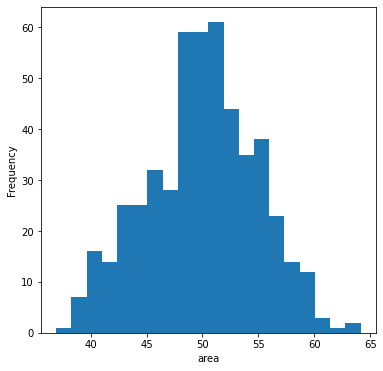

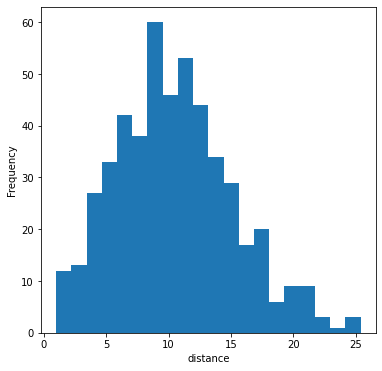

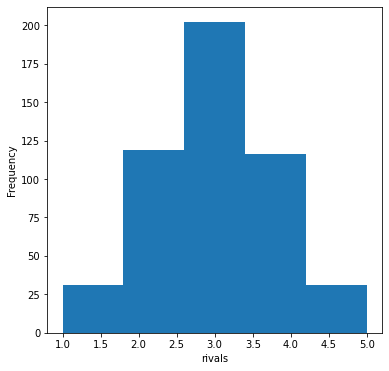

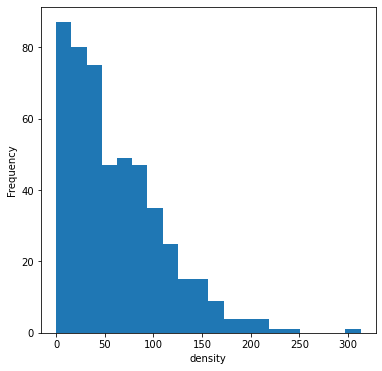

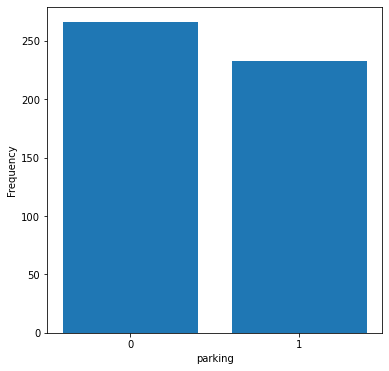

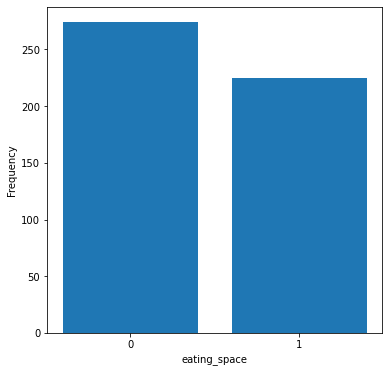

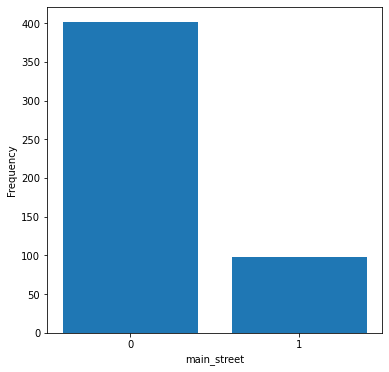

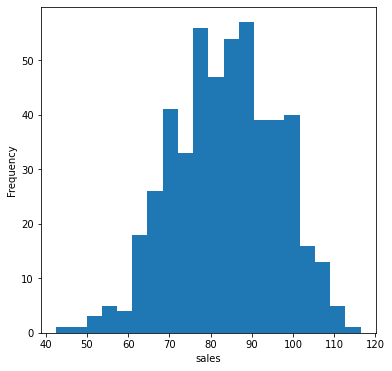

In [34]:
plt.figure(figsize=(6,6))
plt.hist(DF["area"], bins=20)
plt.xlabel("area")
plt.ylabel("Frequency")

plt.figure(figsize=(6,6))
plt.hist(DF["distance"], bins=20)
plt.xlabel("distance")
plt.ylabel("Frequency")

plt.figure(figsize=(6,6))
plt.hist(DF["rivals"], bins=5)
plt.xlabel("rivals")
plt.ylabel("Frequency")

plt.figure(figsize=(6,6))
plt.hist(DF["density"], bins=20)
plt.xlabel("density")
plt.ylabel("Frequency")

plt.figure(figsize=(6,6))
labels = DF["parking"].value_counts().index # 変数の値
heights = DF["parking"].value_counts() # 頻度
plt.bar(labels, heights, tick_label=labels)
plt.xlabel("parking")
plt.ylabel("Frequency")

plt.figure(figsize=(6,6))
labels = DF["eating_space"].value_counts().index
heights = DF["eating_space"].value_counts()
plt.bar(labels, heights, tick_label=labels)
plt.xlabel("eating_space")
plt.ylabel("Frequency")

plt.figure(figsize=(6,6))
labels = DF["main_street"].value_counts().index
heights = DF["main_street"].value_counts()
plt.bar(labels, heights, tick_label=labels)
plt.xlabel("main_street")
plt.ylabel("Frequency")

plt.figure(figsize=(6,6))
plt.hist(DF["sales"], bins=20)
plt.xlabel("sales")
plt.ylabel("Frequency")

## 意思決定写像[ 3-9~3-18 ]

1変数データの数値的特徴把握

In [35]:
print(DF.describe())

            sales        area    distance      rivals     density     parking  \
count  499.000000  499.000000  499.000000  499.000000  499.000000  499.000000   
mean    83.832866   50.001057   10.471727    2.993988   61.465290    0.466934   
std     12.640280    4.936180    4.679084    0.984806   49.363193    0.499406   
min     42.500000   36.922546    1.003504    1.000000    0.026682    0.000000   
25%     75.100000   46.676194    7.042328    2.000000   21.693027    0.000000   
50%     84.400000   50.159624   10.191108    3.000000   48.534961    0.000000   
75%     93.100000   53.368698   13.364437    4.000000   89.343724    1.000000   
max    116.400000   64.136499   25.370184    5.000000  312.813434    1.000000   

       eating_space  main_street  
count    499.000000   499.000000  
mean       0.450902     0.196393  
std        0.498083     0.397668  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        0.000000     0.000000  
75%        1.000000     0

## [ 3-1~3-18 ]考察

外れ値の除去

            sales        area    distance      rivals     density     parking  \
count  499.000000  499.000000  499.000000  499.000000  499.000000  499.000000   
mean    83.832866   50.001057   10.471727    2.993988   61.465290    0.466934   
std     12.640280    4.936180    4.679084    0.984806   49.363193    0.499406   
min     42.500000   36.922546    1.003504    1.000000    0.026682    0.000000   
25%     75.100000   46.676194    7.042328    2.000000   21.693027    0.000000   
50%     84.400000   50.159624   10.191108    3.000000   48.534961    0.000000   
75%     93.100000   53.368698   13.364437    4.000000   89.343724    1.000000   
max    116.400000   64.136499   25.370184    5.000000  312.813434    1.000000   

       eating_space  main_street  
count    499.000000   499.000000  
mean       0.450902     0.196393  
std        0.498083     0.397668  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        0.000000     0.000000  
75%        1.000000     0

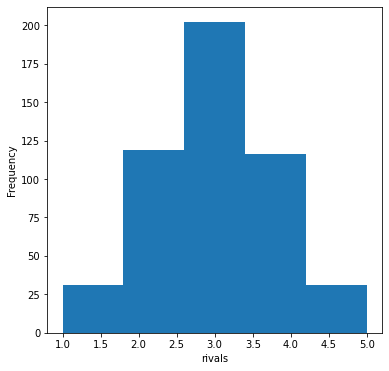

In [36]:
# データ読み込み
# 配布されているstore_sales.csvの297行目を削除することによって
# 外れ値を取り除き，適当なファイル名で保存せよ．
DF2 = pd.read_csv('store_sales 2.csv')

# 外れ値除去結果の確認
plt.figure(figsize=(6,6))
plt.hist(DF2["rivals"], bins=5)
plt.xlabel("rivals")
plt.ylabel("Frequency")

print(DF2.describe())

# その他の変数についてもあたらめて特徴を把握しておくと良い
# plt.figure(figsize=(6,6))
# plt.hist(DF["area"], bins=20)
# plt.xlabel("area")
# plt.ylabel("Frequency")

# plt.figure(figsize=(6,6))
# plt.hist(DF["distance"], bins=20)
# plt.xlabel("distance")
# plt.ylabel("Frequency")

# plt.figure(figsize=(6,6))
# plt.hist(DF["density"], bins=20)
# plt.xlabel("density")
# plt.ylabel("Frequency")

# plt.figure(figsize=(6,6))
# labels = DF["parking"].value_counts().index
# heights = DF["parking"].value_counts()
# plt.bar(labels, heights, tick_label=labels)
# plt.xlabel("parking")
# plt.ylabel("Frequency")

# plt.figure(figsize=(6,6))
# labels = DF["eating_space"].value_counts().index
# heights = DF["eating_space"].value_counts()
# plt.bar(labels, heights, tick_label=labels)
# plt.xlabel("eating_space")
# plt.ylabel("Frequency")

# plt.figure(figsize=(6,6))
# labels = DF["main_street"].value_counts().index
# heights = DF["main_street"].value_counts()
# plt.bar(labels, heights, tick_label=labels)
# plt.xlabel("main_street")
# plt.ylabel("Frequency")

# plt.figure(figsize=(6,6))
# plt.hist(DF["sales"], bins=20)
# plt.xlabel("sales")
# plt.ylabel("Frequency")

## 意思決定写像 [ 3-19~3-25 ]

2変数データの視覚的特徴把握

Text(0, 0.5, 'sales')

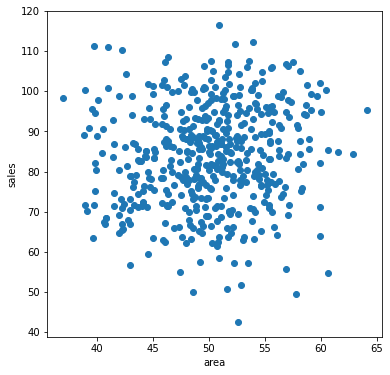

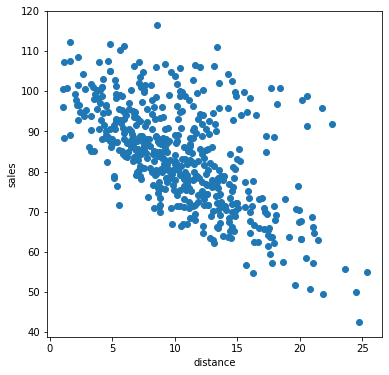

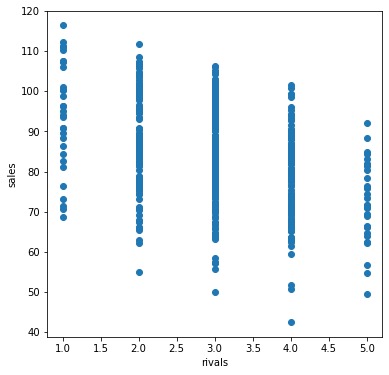

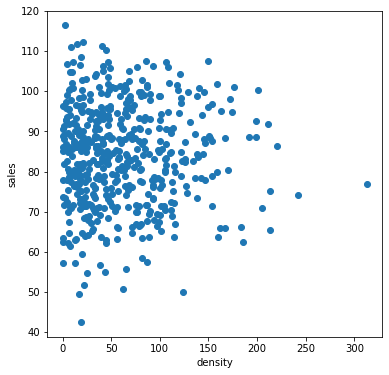

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(DF2["area"], DF2["sales"])
plt.xlabel("area")
plt.ylabel("sales")

plt.figure(figsize=(6,6))
plt.scatter(DF2["distance"], DF2["sales"])
plt.xlabel("distance")
plt.ylabel("sales")

plt.figure(figsize=(6,6))
plt.scatter(DF2["rivals"], DF2["sales"])
plt.xlabel("rivals")
plt.ylabel("sales")

plt.figure(figsize=(6,6))
plt.scatter(DF2["density"], DF2["sales"])
plt.xlabel("density")
plt.ylabel("sales")

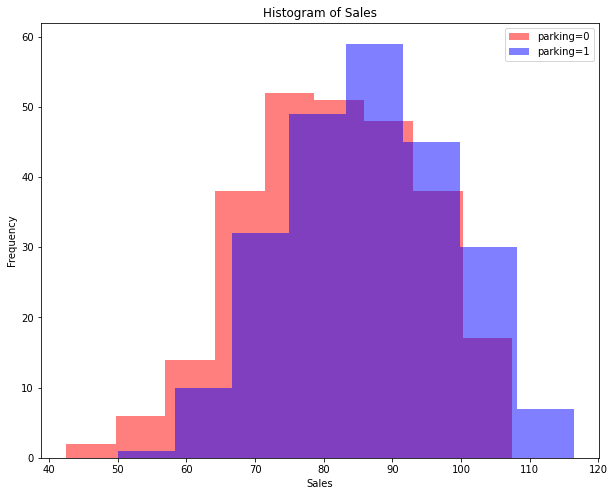

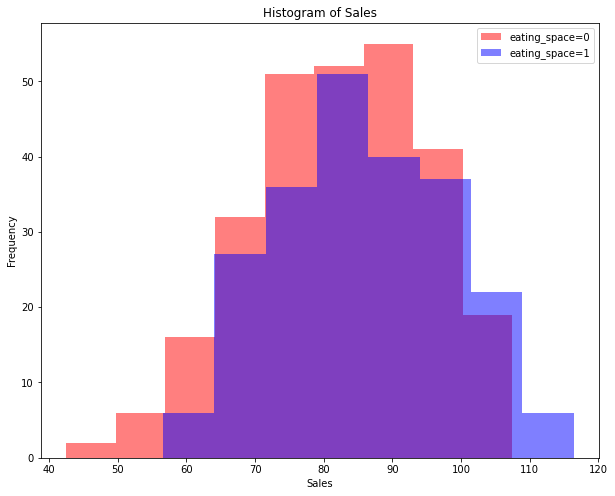

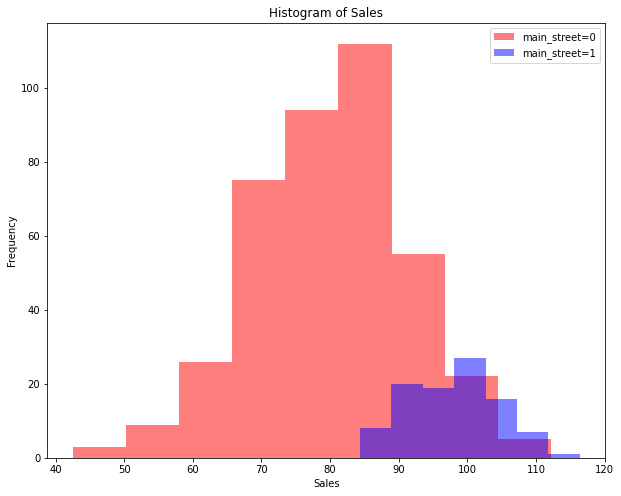

In [38]:
#層別したデータでヒストグラムを作成する

# parking
#階級幅の設定：スタージェスの公式
stur0 = int(np.ceil(np.log2(DF2[DF2["parking"]==0]["sales"].count())))
stur1 = int(np.ceil(np.log2(DF2[DF2["parking"]==1]["sales"].count())))

#ヒストグラムの作成
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(DF2[DF2["parking"]==0]["sales"],
        bins=stur0,
        color='red',
        label='parking=0',
        alpha = 0.5)
ax.hist(DF2[DF2["parking"]==1]["sales"],
        bins=stur1,
        color='blue',
        label='parking=1',
        alpha = 0.5)
ax.set_xlabel('Sales')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Sales')
ax.legend(loc='best')

plt.show()

# eating_space
#階級幅の設定：スタージェスの公式
stur0 = int(np.ceil(np.log2(DF2[DF2["eating_space"]==0]["sales"].count())))
stur1 = int(np.ceil(np.log2(DF2[DF2["eating_space"]==1]["sales"].count())))

#ヒストグラムの作成
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(DF2[DF2["eating_space"]==0]["sales"],
        bins=stur0,
        color='red',
        label='eating_space=0',
        alpha = 0.5)
ax.hist(DF2[DF2["eating_space"]==1]["sales"],
        bins=stur1,
        color='blue',
        label='eating_space=1',
        alpha = 0.5)
ax.set_xlabel('Sales')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Sales')
ax.legend(loc='best')

plt.show()

# main_street
#階級幅の設定：スタージェスの公式
stur0 = int(np.ceil(np.log2(DF2[DF2["main_street"]==0]["sales"].count())))
stur1 = int(np.ceil(np.log2(DF2[DF2["main_street"]==1]["sales"].count())))

#ヒストグラムの作成
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(DF2[DF2["main_street"]==0]["sales"],
        bins=stur0,
        color='red',
        label='main_street=0',
        alpha = 0.5)
ax.hist(DF2[DF2["main_street"]==1]["sales"],
        bins=stur1,
        color='blue',
        label='main_street=1',
        alpha = 0.5)
ax.set_xlabel('Sales')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Sales')
ax.legend(loc='best')

plt.show()

In [39]:
# 以下を実行することで様々な散布図やヒストグラムを一度に描画することもできる．
# ただし，質的変数の視覚的特徴把握にも散布図が出力されてしまうなど，解釈に注意を要する場合がある．
# import seaborn as sns
# sns.pairplot(DF2)

## 意思決定写像 [ 3-26~3-29 ]

2変数データの数値的特徴把握

In [40]:
np.corrcoef(DF2,rowvar=False)
# 以下を用いてもよい
# print(DF2.corr())

array([[ 1.        ,  0.11091838, -0.60503101, -0.39240465,  0.00320851,
         0.21215262,  0.15357247,  0.55702486],
       [ 0.11091838,  1.        , -0.00257034, -0.00813695, -0.0717015 ,
        -0.00910141, -0.08137895,  0.05563211],
       [-0.60503101, -0.00257034,  1.        , -0.05871252,  0.01062632,
        -0.17232528, -0.00721401,  0.01989712],
       [-0.39240465, -0.00813695, -0.05871252,  1.        , -0.08331153,
         0.05471379,  0.07922458, -0.0995276 ],
       [ 0.00320851, -0.0717015 ,  0.01062632, -0.08331153,  1.        ,
         0.0691444 , -0.06287244, -0.04407292],
       [ 0.21215262, -0.00910141, -0.17232528,  0.05471379,  0.0691444 ,
         1.        , -0.0166306 ,  0.01254257],
       [ 0.15357247, -0.08137895, -0.00721401,  0.07922458, -0.06287244,
        -0.0166306 ,  1.        , -0.01204767],
       [ 0.55702486,  0.05563211,  0.01989712, -0.0995276 , -0.04407292,
         0.01254257, -0.01204767,  1.        ]])

# 予測

## 意思決定写像 [ 4-1 ]

AICに基づくモデル選択

モデル1
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \varepsilon$$

In [41]:
#回帰分析

# モデル作成
MODEL = "sales ~ area + distance + rivals + density + parking + eating_space + main_street"

# 回帰分析の実行分析
result = smf.ols(MODEL, DF2).fit()

# 結果の出力
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     559.0
Date:                Thu, 19 May 2022   Prob (F-statistic):          2.64e-229
Time:                        21:55:55   Log-Likelihood:                -1426.1
No. Observations:                 499   AIC:                             2868.
Df Residuals:                     491   BIC:                             2902.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       97.1950      2.159     45.020      0.000      92.953     101.437
area             0.2428      0.039      6.243      0.000       0.166       0.319
distance        -1.6635      0.041    -40.189      0.000      -1.745      -1.582
rivals          -5.0962      0.196    -25.966      0.000      -5.482      -4.711
density          0.0027      0.004      0.684      0.494      -0.005       0.010
parking          3.1535      0.389      8.109      0.000       2.389       3.918
eating_space     5.0086      0.386     12.986      0.000       4.251       5.766
main_street     16.7119      0.483     34.610      0.000      15.763      17.661
==============================================================================
Omnibus:                       20.177   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.607
Skew:                           0.254   Prob(JB):                     1.12e-08
Kurtosis:                       4.226   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

モデル2
$$ y = \beta_0 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \varepsilon$$

In [42]:
# モデル2に基づく分析をこのセルに実行せよ



モデル3
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \varepsilon$$

In [43]:
# モデル3に基づく分析をこのセルに実行せよ
MODEL3 = "sales ~ area + distance + rivals + parking + eating_space + main_street"

# 回帰分析の実行分析
result = smf.ols(MODEL3, DF2).fit()

# 結果の出力
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     652.8
Date:                Thu, 19 May 2022   Prob (F-statistic):          1.25e-230
Time:                        21:55:55   Log-Likelihood:                -1426.3
No. Observations:                 499   AIC:                             2867.
Df Residuals:                     492   BIC:                             2896.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       97.4885      2.115     46.099      0.000      93.333     101.644
area             0.2408      0.039      6.213      0.000       0.165       0.317
distance        -1.6629      0.041    -40.205      0.000      -1.744      -1.582
rivals          -5.1078      0.195    -26.139      0.000      -5.492      -4.724
parking          3.1736      0.388      8.188      0.000       2.412       3.935
eating_space     4.9924      0.385     12.975      0.000       4.236       5.748
main_street     16.6951      0.482     34.638      0.000      15.748      17.642
==============================================================================
Omnibus:                       20.789   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.647
Skew:                           0.264   Prob(JB):                     6.69e-09
Kurtosis:                       4.237   Cond. No.                         572.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

モデル4
$$ y = \beta_0 + \beta_2 x_2 + \beta_3 x_3 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \varepsilon$$

In [44]:
# モデル4に基づく分析をこのセルに実行せよ



※今回は，モデル選択の考え方を身に着けることを目的としたレポートであるため，定性的な考察に基づき上記の4モデルのみのAICを確認しているが，これら以外のモデルのAICを確認しても構わない．もし適切なツールを用いて網羅的に全てのモデルのAICを確認する方法があるならばそのようにすべきである．

# 設定の見直し（設定の検証）

## 分析の再実行

モデル1から4のうち，AICが最も低かったモデルに基づく分析を再実行せよ．これによりresult変数に保存された分析結果がAIC最小のモデルに基づくものに更新される．

In [45]:
# モデル3に基づく分析をこのセルに実行せよ
MODEL3 = "sales ~ area + distance + rivals + parking + eating_space + main_street"

# 回帰分析の実行分析
result = smf.ols(MODEL3, DF2).fit()

# 結果の出力
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     652.8
Date:                Thu, 19 May 2022   Prob (F-statistic):          1.25e-230
Time:                        21:55:55   Log-Likelihood:                -1426.3
No. Observations:                 499   AIC:                             2867.
Df Residuals:                     492   BIC:                             2896.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       97.4885      2.115     46.099      0.000      93.333     101.644
area             0.2408      0.039      6.213      0.000       0.165       0.317
distance        -1.6629      0.041    -40.205      0.000      -1.744      -1.582
rivals          -5.1078      0.195    -26.139      0.000      -5.492      -4.724
parking          3.1736      0.388      8.188      0.000       2.412       3.935
eating_space     4.9924      0.385     12.975      0.000       4.236       5.748
main_street     16.6951      0.482     34.638      0.000      15.748      17.642
==============================================================================
Omnibus:                       20.789   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.647
Skew:                           0.264   Prob(JB):                     6.69e-09
Kurtosis:                       4.237   Cond. No.                         572.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 意思決定写像 [ 5-1~5-3 ]

Text(0, 0.5, 'Residual')

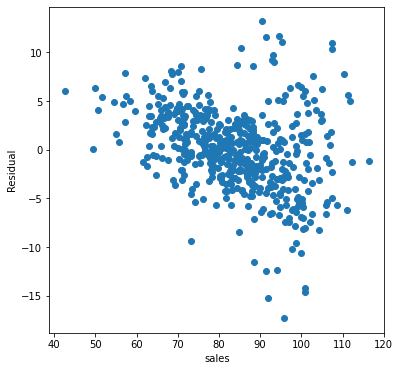

In [46]:
# 残差プロット
plt.figure(figsize=(6,6))
plt.scatter(DF2["sales"], result.fittedvalues-DF2["sales"])
plt.xlabel("sales")
plt.ylabel("Residual")

((array([-2.99148779, -2.70949569, -2.55092824, -2.43849088, -2.35038866,
         -2.27745777, -2.21494281, -2.16004641, -2.11097846, -2.06652166,
         -2.02580925, -1.98820138, -1.95321175, -1.92046179, -1.88965077,
         -1.86053573, -1.83291741, -1.8066303 , -1.7815354 , -1.75751472,
         -1.73446731, -1.71230602, -1.69095513, -1.67034836, -1.65042742,
         -1.63114071, -1.61244233, -1.5942913 , -1.57665082, -1.55948776,
         -1.54277217, -1.52647685, -1.51057708, -1.49505026, -1.47987574,
         -1.46503453, -1.45050917, -1.43628356, -1.42234281, -1.40867313,
         -1.39526172, -1.38209668, -1.36916692, -1.35646209, -1.34397251,
         -1.33168913, -1.31960346, -1.30770751, -1.2959938 , -1.28445526,
         -1.27308524, -1.26187747, -1.250826  , -1.23992522, -1.22916982,
         -1.21855477, -1.20807526, -1.19772678, -1.187505  , -1.17740581,
         -1.1674253 , -1.15755974, -1.14780558, -1.13815942, -1.12861802,
         -1.11917828, -1.10983722, -1.

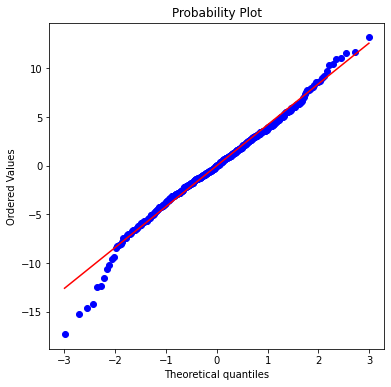

In [47]:
# Q-Qプロット
plt.figure(figsize=(6,6))
stats.probplot(result.fittedvalues-DF2["sales"],dist="norm",plot=plt)

In [48]:
# 正規性の検定
stats.shapiro(result.fittedvalues-DF2["sales"])

ShapiroResult(statistic=0.9865200519561768, pvalue=0.00014210479275789112)

# 設定の見直し（予測式の見直し）

## 意思決定写像 [ 6-1~6-3 ]

層別残差プロット1

縦軸：残差$y_i - \hat{y}_i$，横軸：$y_i$，層別：駐車場$x_5$（質的変数）

Text(0, 0.5, 'Residual')

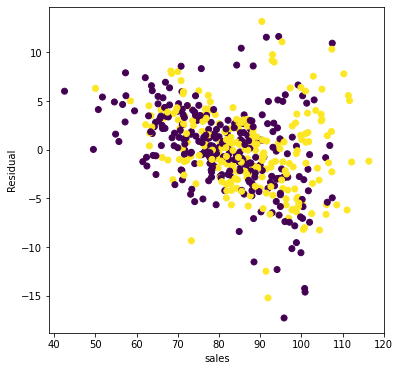

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(DF2["sales"], result.fittedvalues-DF2["sales"], c=DF2["parking"])
plt.xlabel("sales")
plt.ylabel("Residual")

層別残差プロット2

縦軸：残差$y_i - \hat{y}_i$，横軸：$y_i$，層別：イートインスペースの有無$x_6$（質的変数）

Text(0, 0.5, 'Residual')

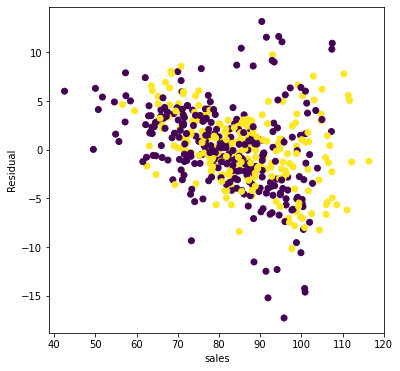

In [50]:
plt.figure(figsize=(6,6))
# 上記の層別残差プロット2を以下に描画せよ
plt.scatter(DF2["sales"], result.fittedvalues-DF2["sales"], c=DF2["eating_space"])
plt.xlabel("sales")
plt.ylabel("Residual")


層別残差プロット3

縦軸：残差$y_i - \hat{y}_i$，横軸：$y_i$，層別：大通りに面しているか否か$x_7$（質的変数）

Text(0, 0.5, 'Residual')

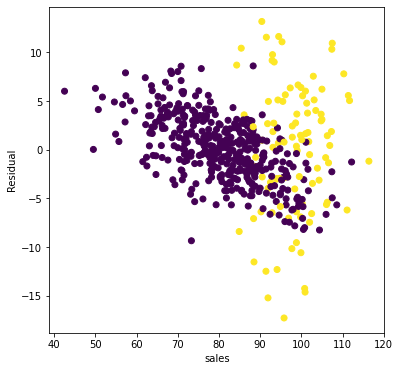

In [51]:
plt.figure(figsize=(6,6))
# 上記の層別残差プロット3を以下に描画せよ
plt.scatter(DF2["sales"], result.fittedvalues-DF2["sales"], c=DF2["main_street"])
plt.xlabel("sales")
plt.ylabel("Residual")


## [ 6-1~6-3 ] 考察

層別散布図

縦軸：駅からの距離$x_2$，横軸：$y_i$，層別：大通りに面しているか否か$x_7$（質的変数）

Text(0, 0.5, 'sales')

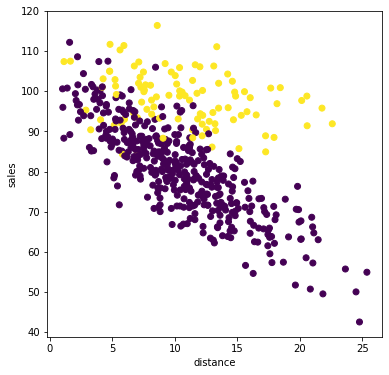

In [52]:
#層別散布図
plt.figure(figsize=(6,6))
plt.scatter(DF2["distance"], DF2["sales"] , c=DF2["main_street"])
plt.xlabel("distance")
plt.ylabel("sales")

## 意思決定写像 [ 6-4~6-7 ]

In [53]:
#交互作用項を含めたモデル作成
MODEL = "sales ~ area + distance + rivals + parking + eating_space + main_street + distance*main_street"

#回帰分析の実行分析
result = smf.ols(MODEL, DF2).fit()

#結果の出力
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1202.
Date:                Thu, 19 May 2022   Prob (F-statistic):          2.62e-304
Time:                        21:56:00   Log-Likelihood:                -1250.4
No. Observations:                 499   AIC:                             2517.
Df Residuals:                     491   BIC:                             2551.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               98.2434      1.488     66.007      0.000      95.319     101.168
area                     0.2877      0.027     10.518      0.000       0.234       0.341
distance                -1.9779      0.032    -61.206      0.000      -2.041      -1.914
rivals                  -5.0800      0.138    -36.945      0.000      -5.350      -4.810
parking                  3.3954      0.273     12.442      0.000       2.859       3.932
eating_space             5.0011      0.271     18.473      0.000       4.469       5.533
main_street             -0.5150      0.839     -0.614      0.540      -2.164       1.134
distance:main_street     1.6187      0.072     22.422      0.000       1.477       1.761
==============================================================================
Omnibus:                        4.011   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.861
Skew:                          -0.170   Prob(JB):                        0.145
Kurtosis:                       3.266   Cond. No.                         573.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

層別残差プロット

縦軸：残差$y_i - \hat{y}_i$，横軸：$y_i$，層別：大通りに面しているか否か$x_7$（質的変数）

Text(0, 0.5, 'Residual')

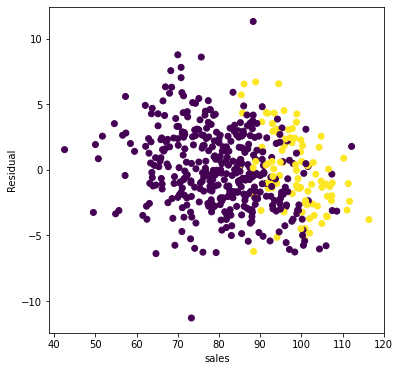

In [54]:
plt.figure(figsize=(6,6))
plt.scatter(DF2["sales"], result.fittedvalues-DF2["sales"], c=DF2["main_street"])
plt.xlabel("sales")
plt.ylabel("Residual")

((array([-2.99148779, -2.70949569, -2.55092824, -2.43849088, -2.35038866,
         -2.27745777, -2.21494281, -2.16004641, -2.11097846, -2.06652166,
         -2.02580925, -1.98820138, -1.95321175, -1.92046179, -1.88965077,
         -1.86053573, -1.83291741, -1.8066303 , -1.7815354 , -1.75751472,
         -1.73446731, -1.71230602, -1.69095513, -1.67034836, -1.65042742,
         -1.63114071, -1.61244233, -1.5942913 , -1.57665082, -1.55948776,
         -1.54277217, -1.52647685, -1.51057708, -1.49505026, -1.47987574,
         -1.46503453, -1.45050917, -1.43628356, -1.42234281, -1.40867313,
         -1.39526172, -1.38209668, -1.36916692, -1.35646209, -1.34397251,
         -1.33168913, -1.31960346, -1.30770751, -1.2959938 , -1.28445526,
         -1.27308524, -1.26187747, -1.250826  , -1.23992522, -1.22916982,
         -1.21855477, -1.20807526, -1.19772678, -1.187505  , -1.17740581,
         -1.1674253 , -1.15755974, -1.14780558, -1.13815942, -1.12861802,
         -1.11917828, -1.10983722, -1.

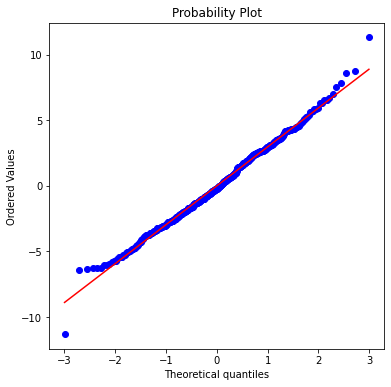

In [55]:
# Q-Qプロット
plt.figure(figsize=(6,6))
stats.probplot(result.fittedvalues-DF2["sales"],dist="norm",plot=plt)

In [56]:
# 正規性の検定
stats.shapiro(result.fittedvalues-DF2["sales"])

ShapiroResult(statistic=0.9943994879722595, pvalue=0.06449660658836365)